<h1> Titanic - Sinking of the unsinkable </h1>

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

### Description: 
The titanic Dataset is analysed and with machine learning technique, survival prediction is made to find out accurate survival rate.

<div class="alert alert-block alert-info">
<h1> Table of Contents</h1></div>

<a class="anchor" id="0.1"></a>
1. [Importing Libararies](#1)
2. [Loading Dataset](#2)
3. [Exploratory Data Analysis with Pandas profiling](#3)<br>
    3.1 [Observations](#3.1)
4. [Exploratory Data Analysis with dabl library](#4)
5. [Feature Engineering](#5)
6. [Label Encoder](#6)
7. [Initial Model Building with dabl Library](#7)<br>
    7.1 [Observation](#7.1)
8. [Spliting dataset for Model builidng](#8)
9. [Decision Tree Model](#9) <br>
    9.1 [Plotting the Decision Tree](#9.1)
10. [Summary](#10)

<div class="alert alert-block alert-info">
<h1>1. Importing Libraries</h1></div><a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
%matplotlib inline

#!pip install dabl
import dabl

# Import label encoder:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Import libraries for model selection and building:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.tree import export_graphviz

# Plotting the decision tree:
import pydotplus

#Displaying the image of the decision tree:
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

print(os.getcwd())

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


F:\BA - Jigsaw\Kaggle\Titanic Machine Learning from Disaster


<div class="alert alert-block alert-info">
<h1>2. Loading Dataset </h1></div> </h1></div><a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [2]:
train = pd.read_csv("train.csv").set_index('PassengerId')
test = pd.read_csv("test.csv").set_index('PassengerId')
survive = pd.read_csv("gender_submission.csv").set_index('PassengerId')

In [3]:
print("The dimension of Train Dataset is:", train.shape)
train.head()

The dimension of Train Dataset is: (891, 11)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
print("The dimension of Test Dataset is:", test.shape)
test.head()

The dimension of Test Dataset is: (418, 10)


Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [5]:
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# 1 -> Survived, 0-> Did not survive

print("Train Dataset - Survival Number as per Sex, PClass, Embark")
survival_rate = pd.DataFrame(train.groupby(["Sex", "Pclass", "Embarked"])["Survived"].count()).style.background_gradient(cmap="bone_r")
survival_rate

Train Dataset - Survival Number as per Sex, PClass, Embark


<div class="alert alert-block alert-info">
<h1>3. Exploratory Data Analysis with Pandas profiling</h1></div> </h1></div><a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [6]:
ProfileReport(train)

<div class="alert alert-block alert-warning">
<h1>3.1 Observations from train dataset </h1></div> </h1></div><a class="anchor" id="3.1"></a>


* Total passengers in the train set is 891.
* 549 (61.6%) **did not survive** in the accident.
* 491 (55.1%) were **3rd class passengers** while 216 (24.2%) were 1st class passengers.
* 577 (64.8%) were **male passengers**.
* Few passengers have **Age** range (0.42-0.92) - preferably outlier or error values. Also 19.9% of the data is missing
* **Cabin** variable has 77.1% missing variables, will drop this variable.
* **Fare** variable might have outlier.


In [7]:
ProfileReport(test)

<div class="alert alert-block alert-info">
<h1>4 Exploratory data Analysis with dabl (Data Analysis Baseline Library) </h1></div>  <a class="anchor" id="4"></a>

**dabl** has been created by [Andreas Mueller](https://amueller.github.io/) and it tries to help make supervised machine learning more accessible for beginners, and reduce boiler plate for common tasks. Dabl takes inspirations from scikit-learn and auto-sklearn. Refer to the official [website](https://amueller.github.io/dabl/dev/index.html) for more info.

[Back to Table of Contents](#0.1)

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


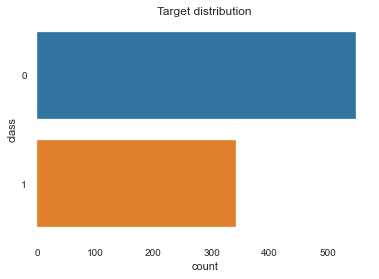

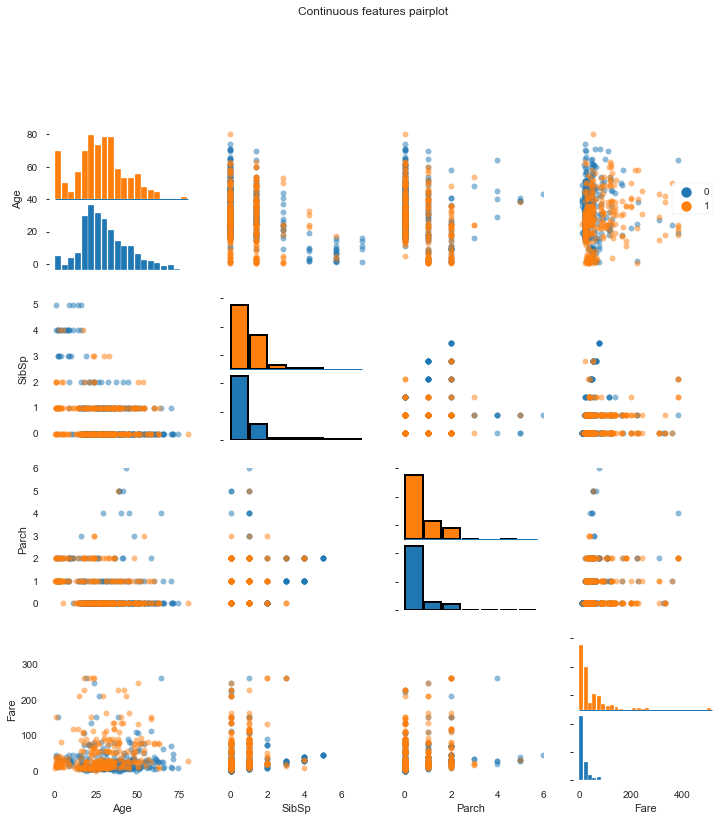

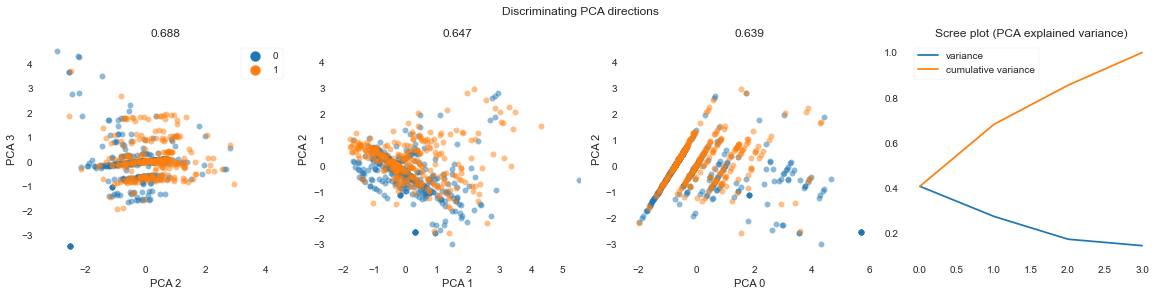

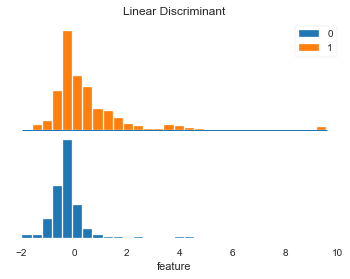

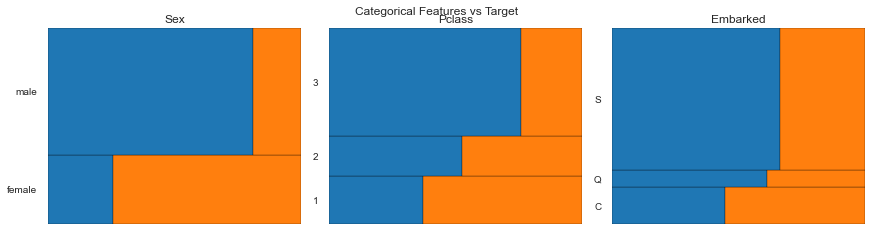

In [8]:
dabl.plot(train, target_col="Survived")

<div class="alert alert-block alert-info">
<h1>5. Feature Engineering</h1></div> <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

In [9]:
# Drop the columns 'cabin' from training and test data as it contains more than 30% missing values

col_drop = ['Cabin']

train.drop(col_drop, axis = 1, inplace = True)
test.drop(col_drop, axis = 1, inplace = True)

In [10]:
# Filling the missing Age variable with mean value 

train['Age'] =train['Age'].fillna(train['Age'].mean())
test['Age'] =test['Age'].fillna(test['Age'].mean())

In [11]:
# Filling the missing Emberked variable with 'S' as the largerst value is 'S' 

train['Embarked'] =train['Embarked'].fillna('S')
test['Embarked'] =test['Embarked'].fillna('S')

In [12]:
# Filling the missing Age variable with mean value 
test['Fare'] =test['Fare'].fillna(test['Fare'].mean())

In [13]:
# Seperating the title from the name
train['Title'] = train.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
test['Title'] = test.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

print("Train[Title] List of unquie values", "(", train['Title'].nunique(), ") :" , train['Title'].unique())
print(" ")
print("Test[Title] List of unquie values", "(", test['Title'].nunique(), ") :" ,test['Title'].unique())

Train[Title] List of unquie values ( 17 ) : ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
 
Test[Title] List of unquie values ( 9 ) : ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [14]:
# Grouping the Title into 5 Category (Mr, Mrs, Miss, Master, Dr)

title_replace_Mr = ['Don','Rev','Sir','Col','Capt','Jonkheer','Major']
title_replace_Mrs = ['Mme','Lady','Mlle','the Countess']
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace(title_replace_Mr,'Mr')
train['Title'] = train['Title'].replace(title_replace_Mrs,'Mrs')

test_title = ['Col','Rev']
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Dona','Mrs')
test['Title'] = test['Title'].replace(test_title,'Mr')

In [15]:
# Dropping unnecessary variable
cols_to_drop = ['Name','Ticket']   
train = train.drop(cols_to_drop, axis=1)   
test = test.drop(cols_to_drop, axis=1)

In [16]:
# Title is as per age
# 1 -> Survived, 0-> Did not survive

print("Train Dataset - Survival Numbers as per Pclass & Title")
survival_rate1 = pd.DataFrame(train.groupby(["Pclass", "Title"])["Survived"].count()).style.background_gradient(cmap="bone_r")
survival_rate1

Train Dataset - Survival Numbers as per Pclass & Title


<div class="alert alert-block alert-info">
<h1>6. Label Encoder</h1></div> <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

In [17]:
# label_encoder object knows how to understand word labels. 
le = LabelEncoder()
  
# Encode labels in column 'species'. 
train['Sex']= le.fit_transform(train.Sex)
train['Embarked'] = le.fit_transform(train.Embarked)
train['Title'] = le.fit_transform(train.Title)

test['Sex']= le.fit_transform(test.Sex)
test['Embarked'] = le.fit_transform(test.Embarked)
test['Title'] = le.fit_transform(test.Title)

<div class="alert alert-block alert-info">
<h1>7. Initial Model Building with dabl Library</h1></div> <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [18]:
# Train dataset:
model_selection = dabl.SimpleClassifier(random_state=0).fit(train, target_col="Survived") 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.416 average_precision: 0.700 roc_auc: 0.807 recall_macro: 0.524 f1_macro: 0.340
=== new best GaussianNB() (using recall_macro):
accuracy: 0.416 average_precision: 0.700 roc_auc: 0.807 recall_macro: 0.524 f1_macro: 0.340

Running MultinomialNB()
accuracy: 0.802 average_precision: 0.800 roc_auc: 0.844 recall_macro: 0.788 f1_macro: 0.790
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.802 average_precision: 0.800 roc_auc: 0.844 recall_macro: 0.788 f1_macro: 0.790

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.791 average_precision: 0.637 roc_auc: 0.784 recall_macro: 0.784 f1_macro: 0.781
Running DecisionTreeClassifie

<div class="alert alert-block alert-warning">
<h1>7.1 Observation</h1></div> <a class="anchor" id="7.1"></a>

**Decision Tree Classifier** is the best model with <br>
    accuracy: 0.828 <br> average_precision: 0.793 <br> roc_auc: 0.861 <br> recall_macro: 0.812<br> f1_macro: 0.816<br>
    

<div class="alert alert-block alert-info">
<h1>8. Spliting dataset for Model builidng</h1></div> <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [20]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.copy()
Y_test = survive["Survived"]

print("Dimension of X_Train:", X_train.shape)
print("Dimension of X_Test:", Y_train.shape)
print("Dimension of Y_Train:", X_test.shape)
print("Dimension of Y_Test:", Y_test.shape)

Dimension of X_Train: (891, 8)
Dimension of X_Test: (891,)
Dimension of Y_Train: (418, 8)
Dimension of Y_Test: (418,)


<div class="alert alert-block alert-info">
<h1>9. Decision Tree Model</h1></div> <a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)

In [21]:
DT = tree.DecisionTreeClassifier(max_depth=3, random_state=200)
DT.fit(X_train, Y_train)
DT_Y_Pred = DT.predict(X_test)

In [23]:
print("Decsison Tree Model Results:\n")
print("Accuracy Score:", round(accuracy_score(Y_test, DT_Y_Pred),2)*100,"%")
print("***************************************************\n")
print("Classification Report:\n", classification_report(Y_test, DT_Y_Pred))
print("***************************************************\n")
print("Confusion Matrix:\n", confusion_matrix(Y_test, DT_Y_Pred))
print("***************************************************")

Decsison Tree Model Results:

Accuracy Score: 94.0 %
***************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.89      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

***************************************************

Confusion Matrix:
 [[249  17]
 [  8 144]]
***************************************************


Text(0.5, 21.5, 'Predicted label')

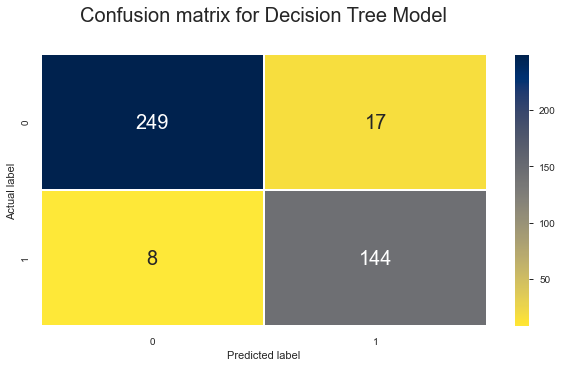

In [24]:
CM = pd.DataFrame(confusion_matrix(Y_test, DT_Y_Pred))

plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True,  fmt=".0f", annot_kws={"size": 20}, cmap="cividis_r", linewidths=0.9)
plt.title('Confusion matrix for Decision Tree Model', y=1.1, fontdict = {'fontsize': 20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

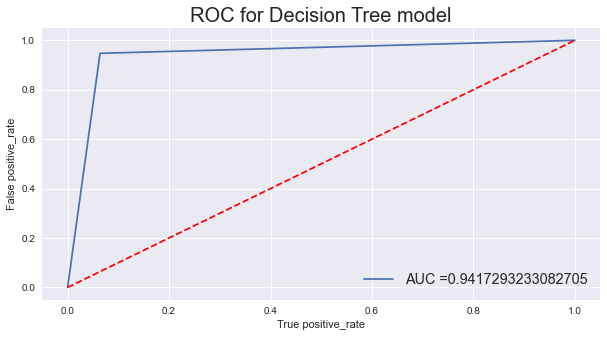

In [25]:
## ROC curve for RF:
fpr, tpr, _ = metrics.roc_curve(Y_test, DT_Y_Pred)
auc = metrics.roc_auc_score(Y_test, DT_Y_Pred)

plt.figure(figsize=(10,5))
plt.style.use('seaborn')
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.plot([0,1],[0,1],"r--")
plt.title("ROC for Decision Tree model", fontdict = {'fontsize': 20})
plt.xlabel("True positive_rate")
plt.ylabel("False positive_rate")
plt.legend(loc= 4, fontsize = "x-large")

<div class="alert alert-block alert-info">
<h1>9.1 Plotting the Decision Tree</h1></div> <a class="anchor" id="9.1"></a>

**Decision Tree Classifier**


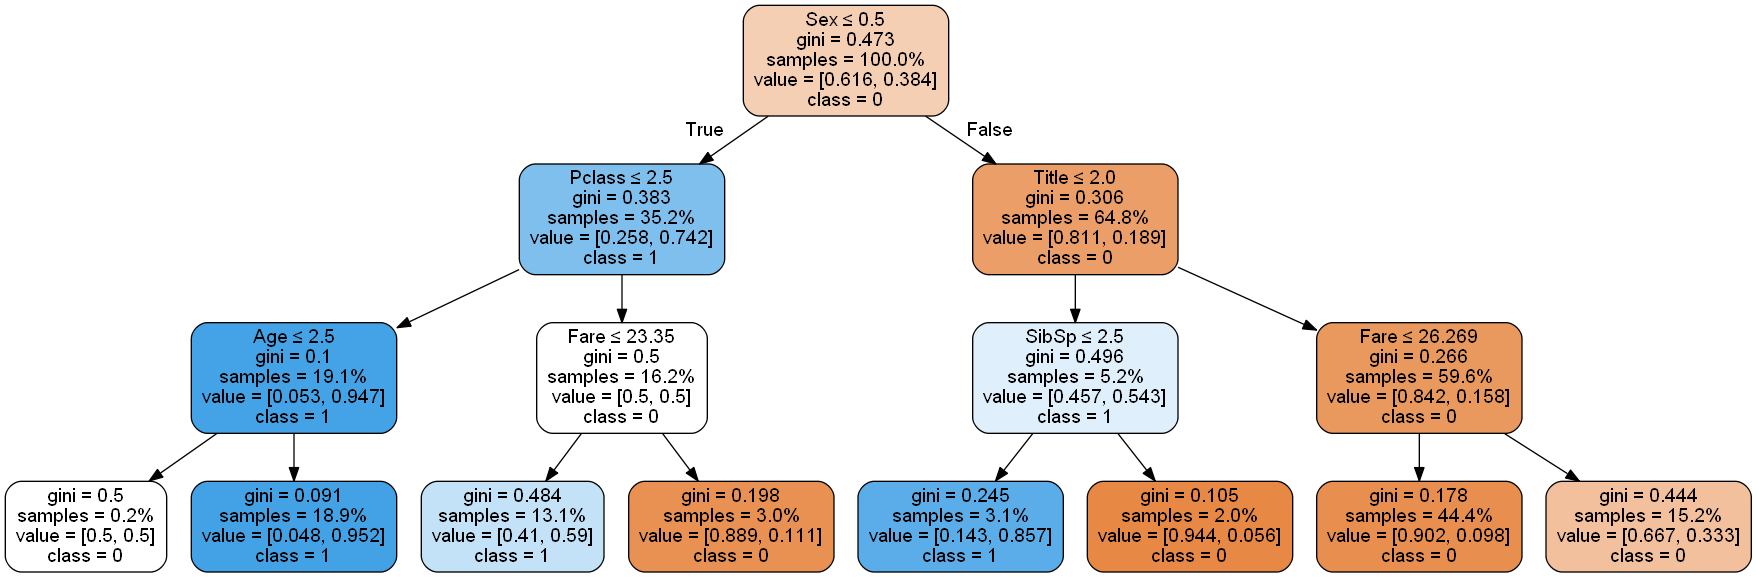

In [37]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
os.chdir('F:\BA - Jigsaw\Kaggle\Titanic Machine Learning from Disaster')

dot_data = tree.export_graphviz(DT, out_file=None, feature_names= test.columns, class_names= ['0','1'], filled= True, rounded=True, special_characters=True, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)

print("**Decision Tree Classifier**")
Image(graph.create_png())

In [38]:
Final_Submission = pd.DataFrame()
Final_Submission['Survived'] = DT_Y_Pred
Final_Submission.to_csv('F:\BA - Jigsaw\Kaggle\Titanic Machine Learning from Disaster\Final_Submission.csv')

<div class="alert alert-block alert-info">
<h1>10. Summary</h1></div> <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

- Decision Tree classifier is choosen to predict the survival accuracy based dabl library for model selection.
- Accuracy and AUC for DTC is 94%.
- The best model for this dataset.

___